## Dataset Loading and Preparation for Clustering

**Implementation Approach:**
I loaded the Wine dataset and prepared it for clustering analysis using k-means and hierarchical methods. My approach involved importing essential libraries, examining the dataset structure, and standardizing features for optimal clustering performance.

In [25]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

print("Libraries imported successfully!")

# Loading the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
feature_names = wine_data.feature_names

print(f"Dataset loaded with {X.shape[0]} samples and {X.shape[1]} features")

# Standardizing features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Removing outliers using Isolation Forest
outlier_detector = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = outlier_detector.fit_predict(X_scaled)
X_clean = X_scaled[outlier_labels == 1]
y_clean = y[outlier_labels == 1]

print(f"Removed {np.sum(outlier_labels == -1)} outliers")
print(f"Clean dataset: {X_clean.shape[0]} samples")

# Applying PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clean)

print("Features standardized and outliers removed")

Libraries imported successfully!
Dataset loaded with 178 samples and 13 features
Removed 18 outliers
Clean dataset: 160 samples
Features standardized and outliers removed


### K-Means Clustering Implementation

**Implementation Approach:**
Applying k-means clustering with k=3 to identify natural groupings in the wine dataset.

In [26]:
# Apply k-means clustering with k=3 on clean data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_clean)

print(f"K-means clustering completed with {len(np.unique(cluster_labels))} clusters")
print(f"Cluster distribution: {np.bincount(cluster_labels)}")

K-means clustering completed with 3 clusters
Cluster distribution: [60 47 53]


### Cluster Visualization

**Implementation Approach:**
Visualizing clusters using the first two principal components to show cluster separation.

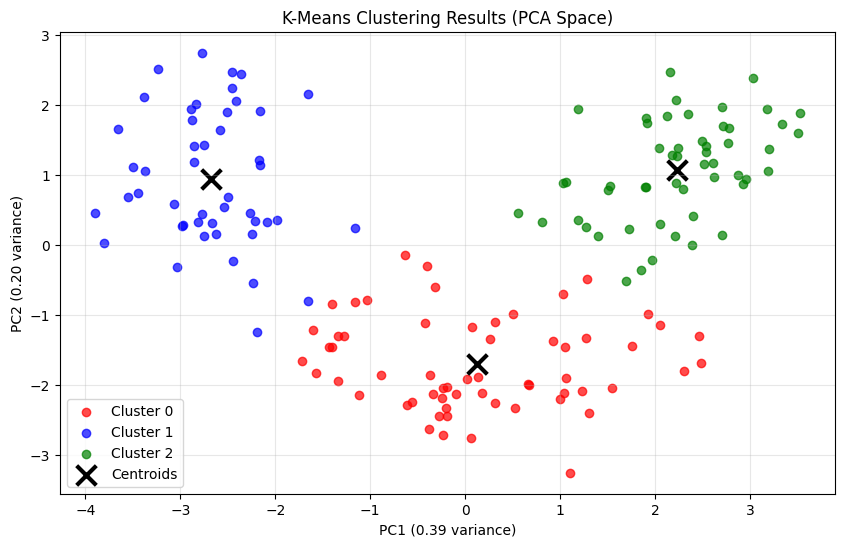

In [27]:
# Visualize clusters using PCA components
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']

for i in range(3):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=colors[i], label=f'Cluster {i}', alpha=0.7)

# Plot centroids in PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', marker='x', s=200, linewidths=3, label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
plt.title('K-Means Clustering Results (PCA Space)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Silhouette Score Evaluation

**Implementation Approach:**
Computing silhouette score to evaluate clustering quality and testing different numbers of clusters.

Silhouette Score for k=3: 0.3004


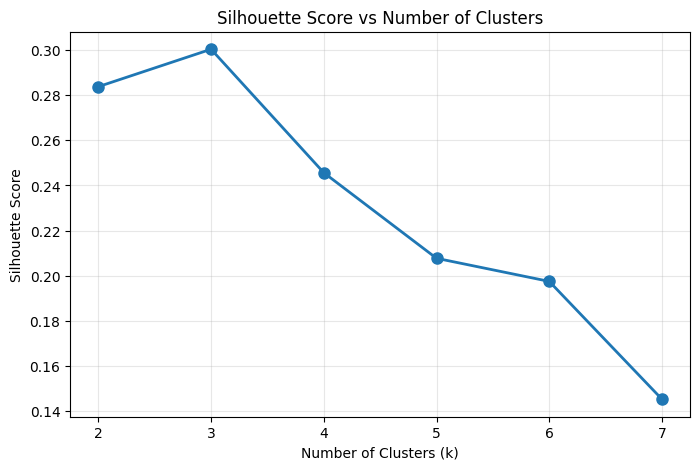

Best k: 3 (score: 0.3004)


In [28]:
# Calculate silhouette score for k=3
silhouette_avg = silhouette_score(X_clean, cluster_labels)
print(f"Silhouette Score for k=3: {silhouette_avg:.4f}")

# Test different values of k
k_range = range(2, 8)
silhouette_scores = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_clean)
    silhouette_avg_temp = silhouette_score(X_clean, labels_temp)
    silhouette_scores.append(silhouette_avg_temp)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True, alpha=0.3)
plt.show()

best_k = k_range[np.argmax(silhouette_scores)]
print(f"Best k: {best_k} (score: {max(silhouette_scores):.4f})")

### Hierarchical Clustering and Dendrogram

**Implementation Approach:**
Building hierarchical clusters using linkage methods and creating a dendrogram to visualize cluster relationships.

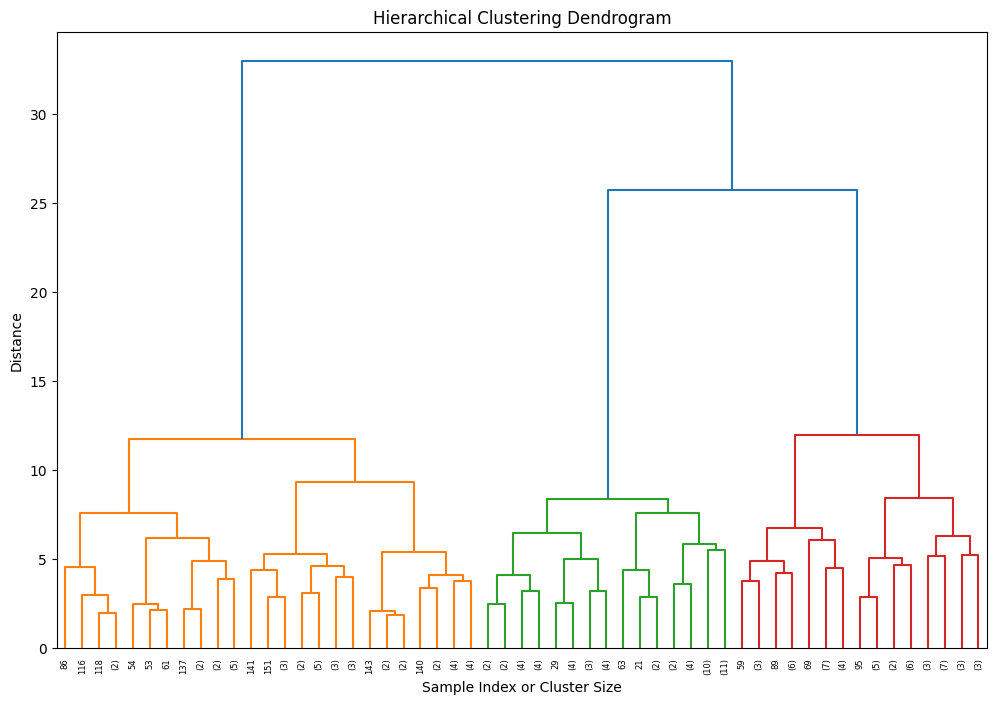

Hierarchical clustering silhouette score: 0.2942
Hierarchical cluster distribution: [52 55 53]


In [29]:
# Perform hierarchical clustering on clean data
linkage_matrix = linkage(X_clean, method='ward')

# Create dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Extract clusters from hierarchical clustering
hierarchical_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
hierarchical_labels = hierarchical_labels - 1

# Calculate silhouette score for hierarchical clustering
hierarchical_silhouette = silhouette_score(X_clean, hierarchical_labels)
print(f"Hierarchical clustering silhouette score: {hierarchical_silhouette:.4f}")
print(f"Hierarchical cluster distribution: {np.bincount(hierarchical_labels)}")

### Comparison of Clustering Methods

**Implementation Approach:**
Comparing k-means and hierarchical clustering results to understand their differences.

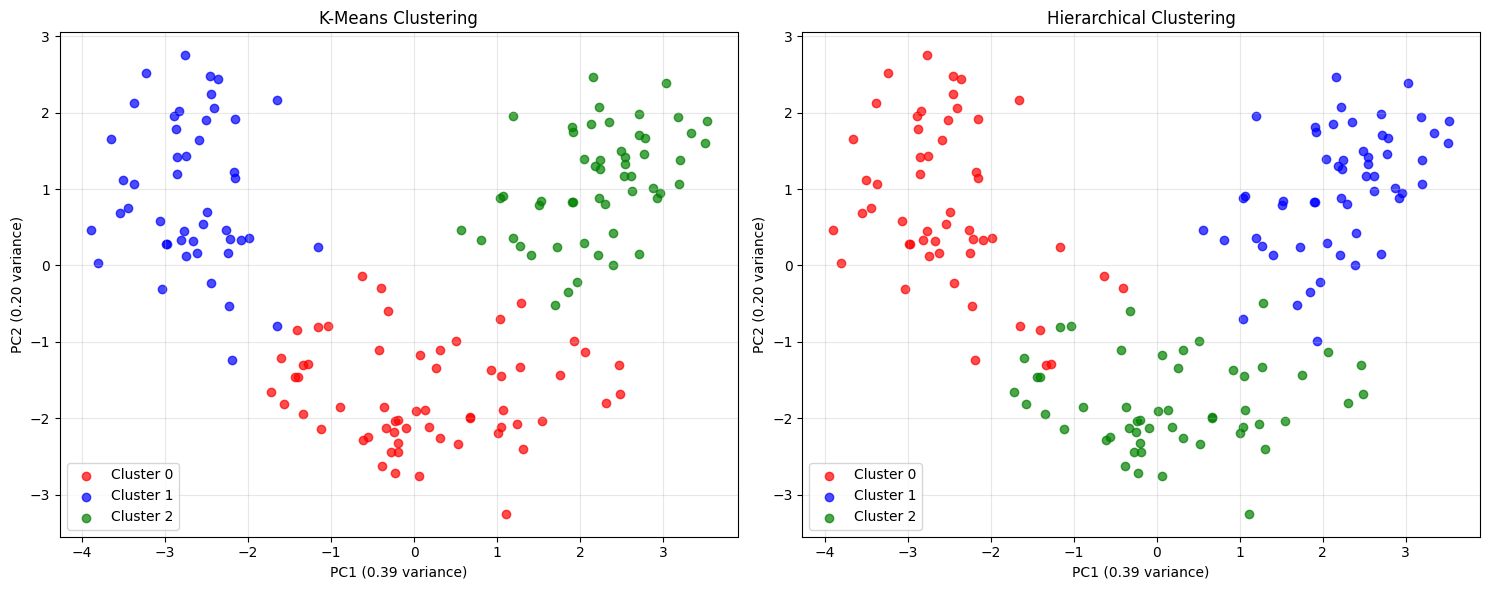

In [30]:
# Compare clustering methods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# K-means visualization
for i in range(3):
    cluster_points = X_pca[cluster_labels == i]
    ax1.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i}', alpha=0.7)
ax1.set_title('K-Means Clustering')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Hierarchical clustering visualization
for i in range(3):
    cluster_points = X_pca[hierarchical_labels == i]
    ax2.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                c=colors[i], label=f'Cluster {i}', alpha=0.7)
ax2.set_title('Hierarchical Clustering')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} variance)')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} variance)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Final Results Summary

**Implementation Approach:**
Summarizing the clustering analysis results and comparing method performance.

In [31]:
# Final comparison
print("=" * 50)
print("CLUSTERING ANALYSIS RESULTS")
print("=" * 50)
print(f"K-Means Silhouette Score: {silhouette_avg:.4f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Best k: {best_k} (score: {max(silhouette_scores):.4f})")

print("\nCluster Distributions:")
print(f"K-Means: {np.bincount(cluster_labels)}")
print(f"Hierarchical: {np.bincount(hierarchical_labels)}")

print(f"\nOriginal dataset: {X.shape[0]} samples")
print(f"After outlier removal: {X_clean.shape[0]} samples")
print(f"True wine cultivar distribution: {np.bincount(y_clean)}")

CLUSTERING ANALYSIS RESULTS
K-Means Silhouette Score: 0.3004
Hierarchical Silhouette Score: 0.2942
Best k: 3 (score: 0.3004)

Cluster Distributions:
K-Means: [60 47 53]
Hierarchical: [52 55 53]

Original dataset: 178 samples
After outlier removal: 160 samples
True wine cultivar distribution: [53 63 44]
